#### 08/09/2021
# Data Science and Business Analytics (GRIP October'21)
## Author: Atharva Joshi
## Task 1 : Prediction using Supervised ML (Linear Regression)
### Problem Statement: Predict the percentage of a student based on the number of study hours.


### Importing Required modules ----->

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

### Reading CSV dataset file ----- >

In [2]:
# Reading dataset
data = pd.read_csv('http://bit.ly/w-data')

In [3]:
data.shape
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Plotting Raw data ------------- >

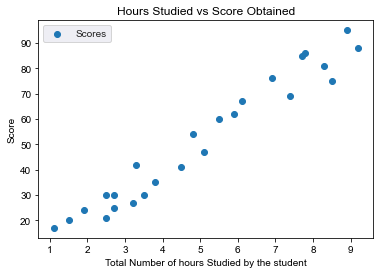

In [6]:
plt.scatter(data.Hours,data.Scores)
sns.set_style('darkgrid')
plt.title('Hours Studied vs Score Obtained')
plt.xlabel('Total Number of hours Studied by the student')
plt.ylabel('Score')
plt.legend(['Scores'])
plt.show()

### Preparing data

In [7]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values
# Using train_test_split method
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

### Training Model

In [8]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
print('Training Complete.')

Training Complete.


In [9]:
print('Intercept-', model.intercept_)
print('Weight-', model.coef_)

Intercept- 2.018160041434683
Weight- [9.91065648]


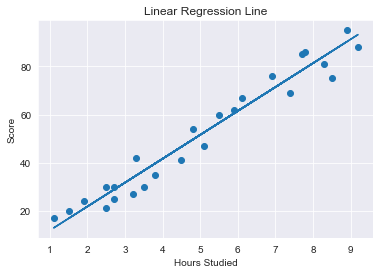

In [10]:
line = model.coef_*x+model.intercept_

# Plotting for test data
plt.scatter(x,y)
plt.plot(x,line)
plt.title('Linear Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [11]:
# Making the predictions
y_pred = model.predict(x_test)

# Comparing Actual vs Predicted Data
obser_df = pd.DataFrame({'Actual':y_test, 'Predicted' : y_pred})
obser_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Data Visualization -------->

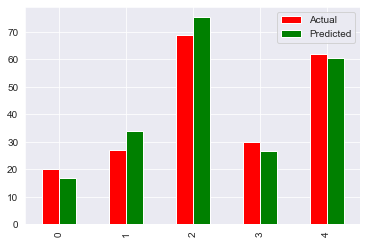

In [12]:
obser_df.plot(kind='bar',color=['red', 'green'])
plt.show()

### Training and Testing Score (Accuracy of the model)

In [13]:
print('Training Score:', model.score(x_train, y_train) * 100, "%")
print('Testing Score:', model.score(x_test, y_test) * 100, "%")

Training Score: 95.15510725211553 %
Testing Score: 94.54906892105356 %


## Predicting the score if a student studies for 9.25 hours/day

In [14]:
hour = 9.25
predicted_score = model.predict([[hour]])
print("No of Hours = ",hour)
print("Predicted Score = ",predicted_score[0])

No of Hours =  9.25
Predicted Score =  93.69173248737538


### Evaluating the model

In [15]:
print('Mean Absolute Error is:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error is:', mean_squared_error(y_test, y_pred))

Mean Absolute Error is: 4.183859899002975
Mean Squared Error is: 21.5987693072174
